In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
file = pd.read_csv('Resources/new_crypto_data.csv')
file

,TotalCoinsMined,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,...,TotalCoinSupply_91388946,TotalCoinSupply_92000000000,TotalCoinSupply_9354000,TotalCoinSupply_9507271,TotalCoinSupply_9736000,TotalCoinSupply_98000000,TotalCoinSupply_98100000000,TotalCoinSupply_990000000000,TotalCoinSupply_999481516,TotalCoinSupply_9999999
0,4.199995e+01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.055185e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.927942e+10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.792718e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.000000e+09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
528,1.493105e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,9.802226e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,7.296538e+06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
new_scaled = StandardScaler().fit_transform(file)
new_scaled

array([[-0.11710817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.0433963 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [14]:
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(new_scaled)
df_crypto_pca = pd.DataFrame(data=crypto_pca)
df_crypto_pca.head(2)

,0,1,2,3,4,5,6,7,8,9,...,264,265,266,267,268,269,270,271,272,273
0,-0.267092,-0.116294,-2.757328e-15,2.186894e-15,0.029497,1.514572,-0.340449,0.089601,-1.867751,-0.424150,...,0.317146,-0.836132,0.250219,-0.717719,1.519058,-0.922604,0.754818,1.251521,0.682882,-1.509471
1,-0.249925,-0.117273,-3.250167e-15,1.058796e-15,0.025167,1.513565,-0.340359,0.089820,-1.869831,-0.424478,...,1.181194,0.396490,2.636099,-0.993679,-0.666197,-0.420255,-0.849528,-0.673010,-1.973161,1.702251


The number of components decreased by 103 from 377 to 274. This shows that the desired 90% of expected variance is held in these 274 components.

In [16]:
tsne = TSNE(learning_rate=35)

In [20]:
tsne_features = tsne.fit_transform(df_crypto_pca)
tsne_features.shape

(532, 2)

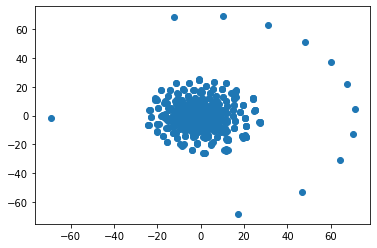

In [26]:
tsne_df = pd.DataFrame()
tsne_df['x'] = tsne_features[: ,0]
tsne_df['y'] = tsne_features[: ,1]

plt.scatter(x=tsne_df['x'], y=tsne_df['y'])
plt.show()    

It doesn't seem like there are clusters to me in this visualization, however, it does seem like there are 2 distinct classes of data points: main grouping and outliers

In [33]:
inertia = []
k = [1,2,3,4,5,6,7,8,9,10,11]

for i in k:
    km = KMeans(n_clusters = i, random_state=0)
    km.fit(tsne_df)
    inertia.append(km.inertia_)
    
elbow_data = {'k':k, 'inertia':inertia}
df_elbow = pd.DataFrame(elbow_data)

C:\Users\Charles Hilgeman\anaconda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


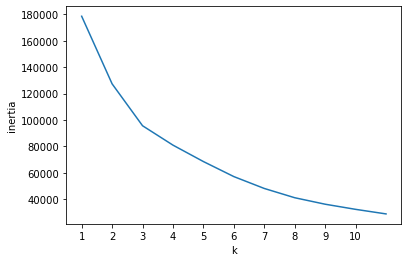

In [32]:
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

From the graph pictured above, it appears the elbow is most pronounced when k=3 so it would be best to assume that there are 3 clusters in the data provided. However, it seems the elbow is not extremely "pronounced" as it is seen to be in other kmeans visualizations; therefore, I would deduce that the given cryptocurrencies cannot be clustered together.